In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concrete-compressive-strength/Concrete Compressive Strength.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('../input/concrete-compressive-strength/Concrete Compressive Strength.csv')

In [4]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnance Slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate', 'Age (day)':'day',
       'Concrete compressive strength(MPa, megapascals) ':'Concrete compressive strength'})

In [10]:
df

,Cement,Blast Furnance Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,day,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [11]:
df.corr()

,Cement,Blast Furnance Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,day,Concrete compressive strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnance Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
day,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete compressive strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [12]:
X = df.drop(['Concrete compressive strength'],axis=1)
y = df['Concrete compressive strength']

In [13]:
X = sm.add_constant(X)

In [14]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF FACTOR'] = [variance_inflation_factor(X.values,i)
                    for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF FACTOR,features
0,6732.373793,const
1,7.488657,Cement
2,7.276529,Blast Furnance Slag
3,6.171455,Fly Ash
4,7.004663,Water
5,2.965297,Superplasticizer
6,5.076044,Coarse Aggregate
7,7.005346,Fine Aggregate
8,1.118357,day


In [15]:
vif.transpose()

,0,1,2,3,4,5,6,7,8
VIF FACTOR,6732.373793,7.488657,7.276529,6.171455,7.004663,2.965297,5.076044,7.005346,1.118357
features,const,Cement,Blast Furnance Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,day


In [16]:
#all dependent variable are relevent to the model
result = sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.615
Model:                                       OLS   Adj. R-squared:                  0.612
Method:                            Least Squares   F-statistic:                     204.3
Date:                           Mon, 10 May 2021   Prob (F-statistic):          6.76e-206
Time:                                   10:51:31   Log-Likelihood:                -3869.0
No. Observations:                           1030   AIC:                             7756.
Df Residuals:                               1021   BIC:                             7800.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -23.1638     26.588     -0.871      0.384     -75.338      29.010
Cement                  0.1198      0.008     14.110      0.000       0.103       0.136
Blast Furnance Slag     0.1038      0.010     10.245      0.000       0.084       0.124
Fly Ash                 0.0879      0.013      6.988      0.000       0.063       0.113
Water                  -0.1503      0.040     -3.741      0.000      -0.229      -0.071
Superplasticizer        0.2907      0.093      3.110      0.002       0.107       0.474
Coarse Aggregate        0.0180      0.009      1.919      0.055      -0.000       0.036
Fine Aggregate          0.0202      0.011      1.883      0.060      -0.001       0.041
day                     0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.305
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


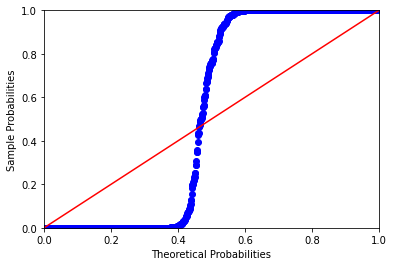

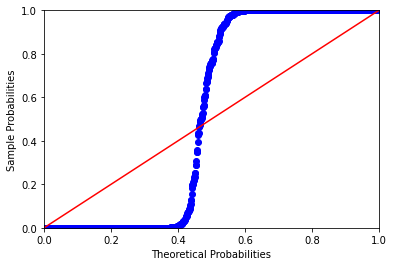

In [17]:
residual = result.resid
probplot = sm.ProbPlot(residual)
probplot.ppplot(line='45')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
pred = lr.predict(X_test)

In [23]:
lr.score(X_train,y_train)

0.610459352793959

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
from sklearn.linear_model import Ridge

In [26]:
rdg = Ridge()
rdg.fit(X_train,y_train)

Ridge()

In [27]:
rdg.predict(X_test)

array([59.65712203, 52.03709643, 63.51961273, 51.57131863, 17.22015466,
       39.86890245, 26.70148459, 44.71998595, 29.35811067, 38.19405927,
       27.75950529, 19.81911818, 66.86529372, 52.2785367 , 29.97499009,
       44.46989321, 29.22747744, 26.53671675, 31.97273518, 32.03281962,
       36.8308633 , 31.78863269, 38.06321582, 25.12709684, 33.1026701 ,
       33.84677513, 14.24402555, 40.33013005, 41.87339169, 21.33728207,
       35.72345111, 30.97450335, 43.88008615, 45.52716816, 30.76258941,
       29.59134072, 28.90854165, 38.84991782, 20.35383068, 38.45362213,
       21.16917531, 15.89014833, 31.06603476, 50.70857397, 20.27772458,
       57.6426175 , 50.89330136, 60.97171645, 20.00501215, 19.22518582,
       40.48414238, 36.24375107, 30.01371174, 33.43495548, 46.67051067,
       51.47106163, 27.72788837, 15.69890743, 29.68923534, 18.12662668,
       38.63280056, 20.53822469, 31.57283627, 55.47745719, 22.94020927,
       21.34032519, 32.26814474, 16.70633791, 25.39344901, 25.54

In [28]:
rdg.score(X_train,y_train)

0.6104593527614837

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)
predict = rfc.predict(X_test)

In [31]:
rfc.score(X_train,y_train)

0.9867380746330513

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

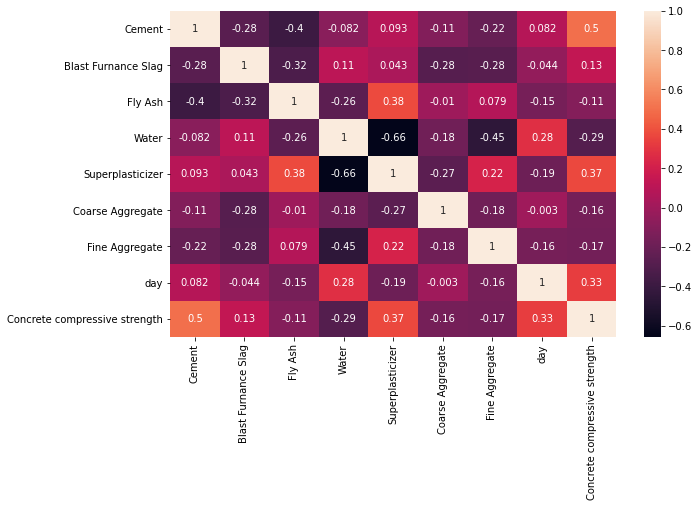

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:ylabel='day'>

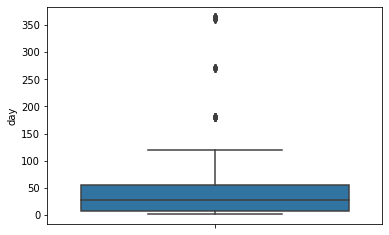

In [34]:
sns.boxplot(y=df['day'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


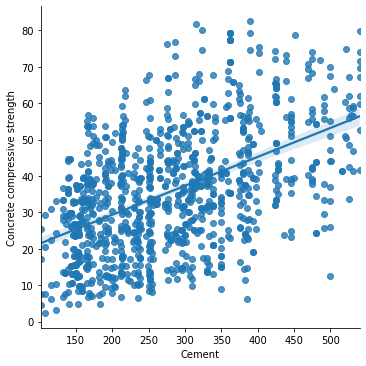

In [35]:
sns.lmplot('Cement','Concrete compressive strength',data=df)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
#scaler = StandardScaler()
#df[['Cement', 'Blast Furnance Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'day','Concrete compressive strength']] = scaler.fit_transform(df)

In [38]:
df

,Cement,Blast Furnance Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,day,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

<AxesSubplot:xlabel='day', ylabel='Concrete compressive strength'>

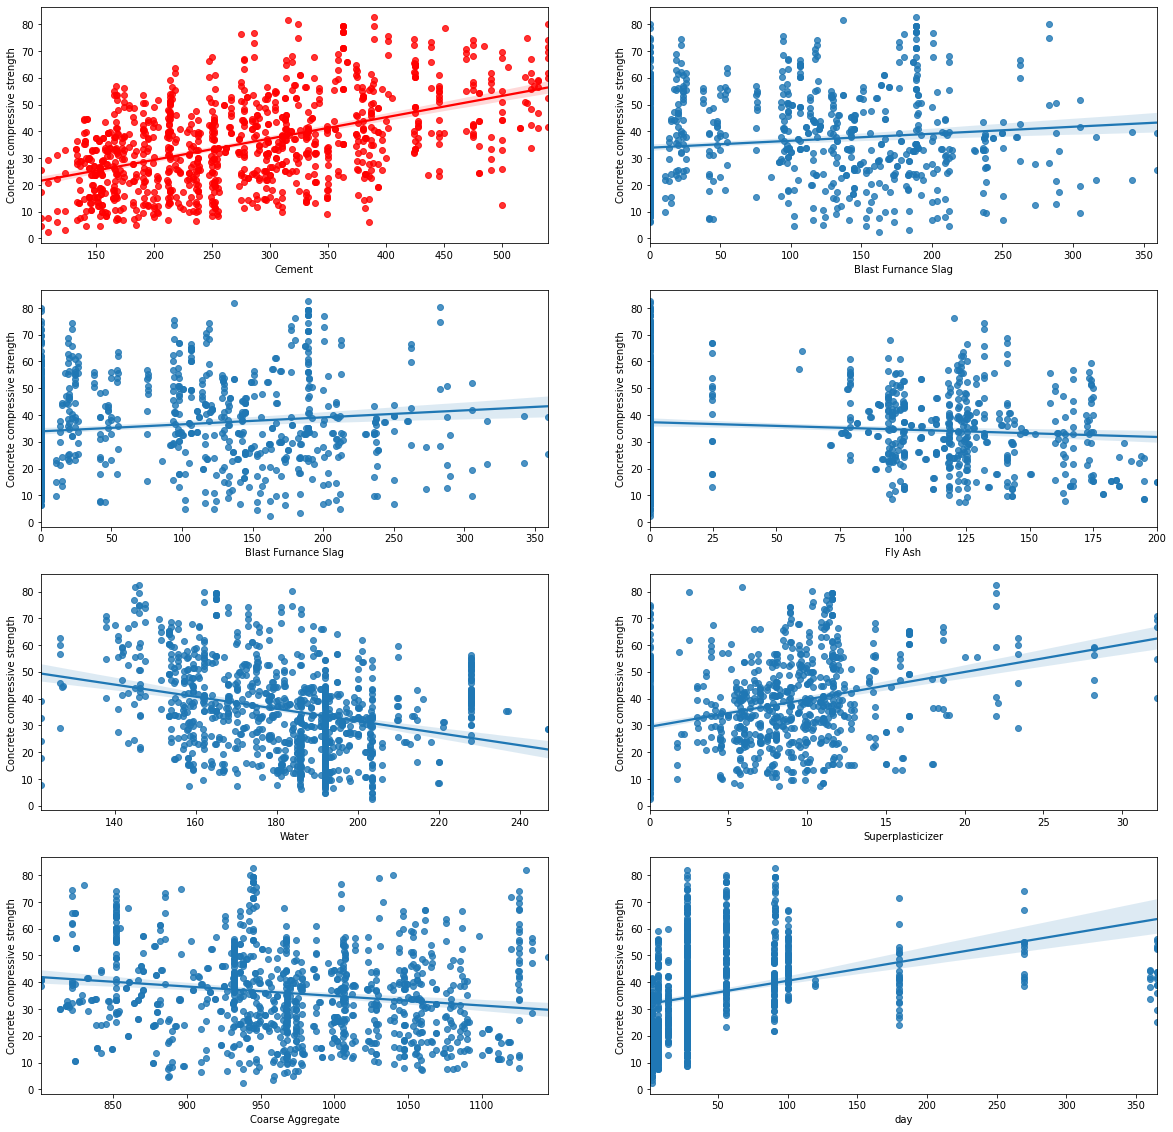

In [39]:
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.regplot('Cement','Concrete compressive strength',data=df,ax=ax[0,0],color='r')
sns.regplot('Blast Furnance Slag','Concrete compressive strength',data=df,ax=ax[0,1])
sns.regplot('Blast Furnance Slag','Concrete compressive strength',data=df,ax=ax[1,0])
sns.regplot('Fly Ash','Concrete compressive strength',data=df,ax=ax[1,1])
sns.regplot('Water','Concrete compressive strength',data=df,ax=ax[2,0])
sns.regplot('Superplasticizer','Concrete compressive strength',data=df,ax=ax[2,1])
sns.regplot('Coarse Aggregate','Concrete compressive strength',data=df,ax=ax[3,0])
#sns.regplot('Fine Aggregate','Concrete compressive strength',data=df,ax=ax[3,1])
sns.regplot('day','Concrete compressive strength',data=df,ax=ax[3,1])

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)


KNeighborsRegressor()

In [42]:
pred = knn.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
knn.score(X_train,y_train)

0.8000479802546167

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
#Linear Regression Model
#root mean squared error is good when the value is less
np.sqrt(mean_squared_error(y_test,predict))

5.65967822517047

In [47]:
#KNN 
np.sqrt(mean_squared_error(y_test,pred))

8.238386013632075

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_predict = dtr.predict(X_test)

dtr.score(X_train,y_train)

0.9975417004090303

In [50]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_absolute_percentage_error

In [51]:
print('MAE:',mean_absolute_error(y_test,dtr_predict))

MAE: 4.47149905779681


In [52]:
#RMSE
print('RMSE:',np.sqrt(mean_squared_error(y_test,dtr_predict)))

RMSE: 6.80650397426396


In [53]:
print('MAPE:',mean_absolute_percentage_error(y_test,dtr_predict))

MAPE: 0.14236056062934876


In [54]:
dtr_predict

array([51.73276323, 39.39665864, 71.29871316, 35.3011712 , 10.53588276,
       44.27814872, 23.69660064, 51.0556978 , 33.72916592, 38.89334116,
       44.38846488, 17.20035777, 36.3009114 , 35.10122316, 17.8229546 ,
       20.41607384, 40.06200298, 21.81984697, 37.17103011, 31.81242264,
       38.80439876, 45.3675208 , 45.08483564, 19.41564416, 33.72916592,
       33.94290348, 12.73462172, 41.05346947, 58.60546   , 14.98920824,
       41.05346947, 32.72253096, 39.70002808, 51.0556978 , 19.41564416,
       36.44776979, 33.72916592, 41.540929  , 10.35455057, 47.401475  ,
       18.91232668,  2.33180783, 43.25082948, 46.68441996,  6.8085755 ,
       61.09446836, 61.21512666, 34.48758952, 27.53077668,  8.06342182,
       57.21823429, 47.7144971 , 24.3385028 , 17.20035777, 44.13335876,
       35.3011712 , 31.81242264, 11.48391226, 38.56239268, 19.69143456,
       41.540929  , 13.52062436, 34.55653712, 54.09628696, 28.02168359,
       18.03393426, 33.39821744, 12.18097249, 31.53663224, 22.31